Construction Industry Labor Market Indicators
======

## Examining summary statistics and calculating basic indicators of labor market slack

-----

*Brian Dew*<br>
*September 12, 2017*<br>
*Email: dew@cepr.net*<br>
*Twitter: @bd_econ*<br>

The objective is to examine whether the labor market for construction workers is as tight as advertised. Three indicator are used: 

1. Unemployed construction workers per job opening
2. Nominal wage growth in construction vs all industries
3. Rate of change in the average number of hours worked per week

### Import preliminaries

In [1]:
import pandas as pd
import json
import requests
import config

### Select variables to request

In [2]:
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
key = '?registrationkey={}'.format(config.bls_key)
headers = {'Content-type': 'application/json'}   # Request json data
sd = {'CES0500000008': 'TOT_AHE',
      'CES2000000008': 'CON_AHE',
      'JTU23000000JOL': 'CON_JOU',
      'JTU00000000JOL': 'TOT_JOU',
      'LNU03032231': 'CON_UN',
      'LNU03000000': 'TOT_UN',
      'CES2000000007': 'CON_HRS'}

### Request data from BLS API

In [6]:
data = json.dumps({"seriesid":list(sd.keys()), "startyear":'2008', "endyear":'2017'})
p = requests.post('{}{}'.format(url, key), headers=headers, data=data).json()
print(p['status'])

REQUEST_SUCCEEDED


### Load data into pandas dataframe

In [7]:
df = pd.DataFrame()
for s in p['Results']['series']:
    df[sd[s['seriesID']]] = pd.Series(index = pd.to_datetime(
        ['{} {}'.format(i['period'], i['year']) for i in s['data']]),
        data = [i['value'] for i in s['data']]).astype(float).iloc[::-1]

### Calculate basic ratios

In [8]:
for ind in ['CON', 'TOT']:
    df[ind+'_UNOP'] = df[ind+'_UN'].divide(df[ind+'_JOU'])
    df[ind+'_wage_ch'] = df[ind+'_AHE'].pct_change(12)

### View results

In [9]:
df.tail(10)

,CON_HRS,CON_AHE,CON_JOU,CON_UN,TOT_JOU,TOT_AHE,TOT_UN,CON_UNOP,CON_wage_ch,TOT_UNOP,TOT_wage_ch
2016-11-01,39.8,26.24,178.0,517.0,5379.0,21.74,7066.0,2.904494,0.031447,1.313627,0.024988
2016-12-01,39.2,26.23,140.0,670.0,5116.0,21.80,7170.0,4.785714,0.031053,1.401486,0.025400
2017-01-01,39.3,26.33,142.0,859.0,5557.0,21.83,8149.0,6.049296,0.036206,1.466439,0.023921
2017-02-01,39.8,26.29,181.0,781.0,5500.0,21.86,7887.0,4.314917,0.034632,1.434000,0.024848
2017-03-01,39.3,26.40,161.0,764.0,5723.0,21.90,7284.0,4.745342,0.027637,1.272759,0.023364
2017-04-01,39.9,26.37,200.0,585.0,6312.0,21.96,6555.0,2.925000,0.025272,1.038498,0.023299
2017-05-01,39.9,26.52,163.0,502.0,5701.0,21.99,6572.0,3.079755,0.025522,1.152780,0.023743
2017-06-01,39.7,26.63,212.0,430.0,6075.0,22.03,7250.0,2.028302,0.022265,1.193416,0.023223
2017-07-01,39.7,26.75,232.0,469.0,6502.0,22.08,7441.0,2.021552,0.024119,1.144417,0.022696
2017-08-01,39.7,26.81,NaN,448.0,NaN,22.12,7287.0,NaN,0.028385,NaN,0.023127


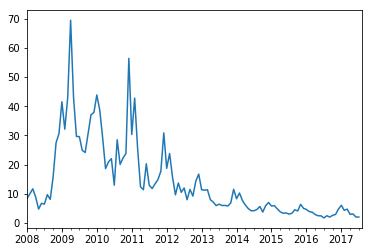

In [11]:
%matplotlib inline
df['CON_UNOP'].plot()

In [12]:
df2 = df.reset_index()

In [16]:
df2 = df2.dropna()